In [30]:
from skimage import restoration
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import ndimage
from astropy import convolution
%matplotlib inline

In [7]:
x = np.arange(-10,10.,0.01)
y1 = stats.norm(0,1.).pdf(x)
y2 = stats.norm(0,3.).pdf(x)

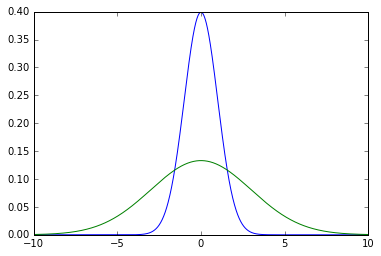

In [8]:
plt.plot(x,y1)
plt.plot(x,y2)

In [9]:
kernel = restoration.richardson_lucy(y2,y1,iterations=50)

IndexError: too many indices for array

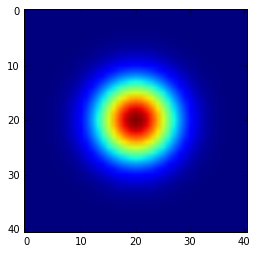

In [43]:
psf = convolution.Gaussian2DKernel(5.)
plt.imshow(psf.array)
psf.array.sum()
psf = psf.array

In [58]:
from skimage import color, data, restoration
camera = color.rgb2gray(data.camera())
from scipy.signal import convolve2d
#psf = np.ones((5, 5)) / 25
camera = convolve2d(camera, psf, 'same')
camera += 0.1 * camera.std() * np.random.standard_normal(camera.shape)
deconvolved = restoration.richardson_lucy(camera, psf, 100)

In [56]:
deconvolved

array([[  3.69662398e-28,   2.04214476e-23,   1.00544273e-19, ...,
          8.35917503e-20,   1.65317461e-23,   2.91496980e-28],
       [  2.02792173e-23,   1.12325095e-18,   5.54482871e-15, ...,
          4.69995204e-15,   9.29119004e-19,   1.63745675e-23],
       [  9.89653646e-20,   5.49683035e-15,   2.72092791e-11, ...,
          2.35315569e-11,   4.65083362e-15,   8.19392308e-20],
       ..., 
       [  6.72324326e-20,   3.90001722e-15,   2.03094572e-11, ...,
          3.91814355e-11,   7.87584030e-15,   1.40078429e-19],
       [  1.38354893e-23,   8.06750994e-19,   4.22576783e-15, ...,
          8.97975199e-15,   1.81222433e-18,   3.23394439e-23],
       [  2.53519364e-28,   1.48560436e-23,   7.82461035e-20, ...,
          1.81200372e-19,   3.66887594e-23,   6.56510681e-28]])

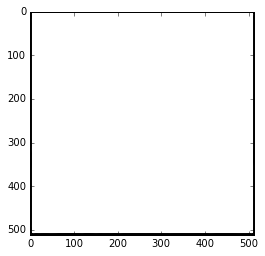

In [57]:
plt.imshow(deconvolved,cmap=plt.cm.gray)

In [33]:
help(convolution.Gaussian2DKernel)

Help on class Gaussian2DKernel in module astropy.convolution.kernels:

class Gaussian2DKernel(astropy.convolution.core.Kernel2D)
 |  2D Gaussian filter kernel.
 |  
 |  The Gaussian filter is a filter with great smoothing properties. It is
 |  isotropic and does not produce artifacts.
 |  
 |  Parameters
 |  ----------
 |  stddev : number
 |      Standard deviation of the Gaussian kernel.
 |  x_size : odd int, optional
 |      Size in x direction of the kernel array. Default = 8 * stddev.
 |  y_size : odd int, optional
 |      Size in y direction of the kernel array. Default = 8 * stddev.
 |  mode : str, optional
 |      One of the following discretization modes:
 |          * 'center' (default)
 |              Discretize model by taking the value
 |              at the center of the bin.
 |          * 'linear_interp'
 |              Discretize model by performing a bilinear interpolation
 |              between the values at the corners of the bin.
 |          * 'oversample'
 |       